Antes de comenzar, tendremos que para utilizar estas funciones, se necesita la función objetivo $f$, su gradiente $df$, y el hessiano $ddf$. Definiendo la estructura genérica para los métodos de descenso:

* `f`: Función objetivo
* `df`: Gradiente de la función objetivo.
* `ddf`: El hessiano de la función objetivo.
* `x0`: Punto de inicio.
* `a`: Step size.
* `maxIter`: Número máximo de pasos o iteraciones.
* `e`: Tolerancia para el criterio de paro.
* `stopCriterion`: Criterio de paro.

In [75]:
using LinearAlgebra

1. **Descenso Gradiente Naive con Dirección Aleatoria**

In [76]:
function GradNaiveRand(f, df, x0, a, maxIter, e, stopCriterion)
    # Definir el punto inicial
    x = x0

    # x_k es la secuencia de puntos x obtenidos en cada iteración
    x_k = [x0]

    # f_k es la secuencia de valores de la función objetivo en cada iteración
    f_k = [f(x0)]
    errors = []

    for k in 1:maxIter
        # Generar la dirección de descenso al gradiente de forma aleatoria
        d = randn(length(x))

        # Normalizar la dirección de descenso
        d = d/norm(d)

        # Calcular el nuevo punto
        x_new = x + a*d

        # Guardar el nuevo punto y el valor de la función objetivo
        push!(x_k, x_new)
        push!(f_k, f(x_new))

        # Calcular el error
        error = norm(df(x_new))

        # Guardar el error
        push!(errors, error)

        # Si se cumple el criterio de paro, terminar
        if error < e
            return x_new, x_k, f_k, errors, k, true
        end

        # Actualizar el punto actual
        x = x_new    
    end

    # Retornar el punto actual, la secuencia de puntos, la secuencia de valores de la función objetivo, la secuencia de errores, el número de iteraciones
    # Y un indicador que no converge
    return x, x_k, f_k, errors, maxIter, false
end

GradNaiveRand (generic function with 1 method)

2. **Descenso Máximo Naive**

In [77]:
function GradNaiveMax(f, df, x0, a, maxIter, e, stopCriterion)
    # Definir el punto inicial
    x = x0

    # x_k es la secuencia de puntos x obtenidos en cada iteración
    x_k = [x0]

    # f_k es la secuencia de valores de la función objetivo en cada iteración
    f_k = [f(x0)]

    errors = []

    for k in 1:maxIter
        # Calcular la dirección de descenso gradiente
        d = df(x)

        # Asegurarse de que x y d tengan las mismas dimensiones
        if length(x) != length(d)
            throw(DimensionMismatch("x y d deben tener las mismas dimensiones"))
        end

        # Calcular el nuevo punto
        x_new = x - a*d  # Cambiado a restar el gradiente

        # Guardar el nuevo punto y el valor de la función objetivo
        push!(x_k, x_new)
        push!(f_k, f(x_new))

        # Calcular el error
        error = norm(df(x_new))  # Cambiado a x_new

        # Guardar el error
        push!(errors, error)

        # Si se cumple el criterio de paro, terminar
        if error < e
            return x_new, x_k, f_k, errors, k, true
        end

        # Actualizar el punto actual
        x = x_new
    end

    # Retornar el punto actual, la secuencia de puntos, la secuencia de valores de la función objetivo, la secuencia de errores, el número de iteraciones
    # Y un indicador que no converge
    return x, x_k, f_k, errors, maxIter, false
end

GradNaiveMax (generic function with 1 method)

3. **Descenso Gradiente de Newton**

In [78]:
function GradNewton(f, df, x0, a, maxIter, e, stopCriterion)
    # Definir el punto inicial
    x = x0

    # x_k es la secuencia de puntos x obtenidos en cada iteración
    x_k = [x0]

    # f_k es la secuencia de valores de la función objetivo en cada iteración
    f_k = [f(x0)]

    errors = []

    # Inicializar la matriz identidad para el Hessiano
    H_I = I(length(x0))

    for k in 1:maxIter
        # Calcular la dirección de descenso
        d = - H_I * df(x)

        # Calcular el nuevo punto
        x_new = x + a*d

        # Guardar el nuevo punto y el valor de la función objetivo
        push!(x_k, x_new)
        push!(f_k, f(x_new))

        # Calcular el error
        error = norm(df(x))
        push!(errors, error)

        # Si se cumple el criterio de paro, terminar
        if error < e
            return x_new, x_k, f_k, errors, k, true
        end

        # Actualización del Hessiano Inverso
        s = x_new - x
        y = df(x_new) - df(x)
        rho = 1/(y'*s)
        H_I = (I -rho*s*y')*H_I*(I-rho*y*s') + rho*s*s'

        # Actualizar el punto actual
        x = x_new

    end

    return x, x_k, f_k, errors, maxIter, false
end

GradNewton (generic function with 1 method)

4. **Descenso Gradiente de Newton (Hessiano Exacto)**

In [79]:
function GradNewtonExact(f, df, ddf, x0, a, maxIter, e, stopCriterion)

    λ = 1e-6  # Regularización

    # Definir el punto inicial
    x = x0

    # x_k es la secuencia de puntos x obtenidos en cada iteración
    x_k = [x0]

    # f_k es la secuencia de valores de la función objetivo en cada iteración
    f_k = [f(x0)]

    errors = []

    for k in 1:maxIter
        # Obtener la dirección de descenso
        g = df(x)
        H = ddf(x) + λ * I

        # Resolver el sistema de ecuaciones
        d = -H\g

        # Calcular el nuevo punto
        x_new = x + a*d

        # Guardar el nuevo punto y el valor de la función objetivo
        push!(x_k, x_new)
        push!(f_k, f(x_new))

        # Calcular el error
        error = norm(df(x))
        push!(errors, error)

        # Si se cumple el criterio de paro, terminar
        if error < e
            return x_new, x_k, f_k, errors, k, true
        end

        # Actualizar el punto actual
        x = x_new
    end

    return x, x_k, f_k, errors, maxIter, false
end

GradNewtonExact (generic function with 1 method)

In [80]:
using Random
using LinearAlgebra

function suma_gaussianas(x, xk, σ)
    k = length(xk)
    sum = 0.0
    for i in 1:k
        diff = x .- xk[i]
        sum -= exp(-norm(diff)^2 / (2 * σ^2))
    end
    return sum
end

suma_gaussianas (generic function with 1 method)

In [81]:
function generar_puntos(k, rect)
    xk = [rand(rect) for _ in 1:k]
    return xk
end

# Parámetros
k = 8
rect = [0 8; 0 8]
σ = 1.0

# Generar puntos aleatorios
xk = generar_puntos(k, rect)

8-element Vector{Int64}:
 0
 8
 8
 0
 0
 8
 0
 8

In [82]:
function df_suma_gaussianas(x, xk, σ)
    k = length(xk)
    grad = zeros(length(x))
    for i in 1:k
        diff = x .- xk[i]
        grad += exp(-norm(diff)^2 / (2 * σ^2)) .* diff / σ^2
    end
    return grad
end

function ddf_suma_gaussianas(x, xk, σ)
    k = length(xk)
    n = length(x)
    H = zeros(n, n)
    for i in 1:k
        diff = x .- xk[i]
        norm_diff2 = norm(diff)^2
        exp_term = exp(-norm_diff2 / (2 * σ^2))
        H += exp_term * (I / σ^2 - (diff * diff') / σ^4)
    end
    return H
end

# Parámetros de optimización
α = 0.001
maxIter = 10000
ε = 1e-6
stop_criterion = :gradiente

# Inicializaciones distintas
x0_list = [rand(2) * 8 for _ in 1:5]

# Aplicar el método de optimización
results = []
for x0 in x0_list
    x_opt, xk, fk, errores, iteraciones, convergencia = GradNewtonExact(
        x -> suma_gaussianas(x, xk, σ),
        x -> df_suma_gaussianas(x, xk, σ),
        x -> ddf_suma_gaussianas(x, xk, σ),
        x0, α, maxIter, ε, stop_criterion
    )
    push!(results, (x_opt, xk, fk, errores, iteraciones, convergencia))
end

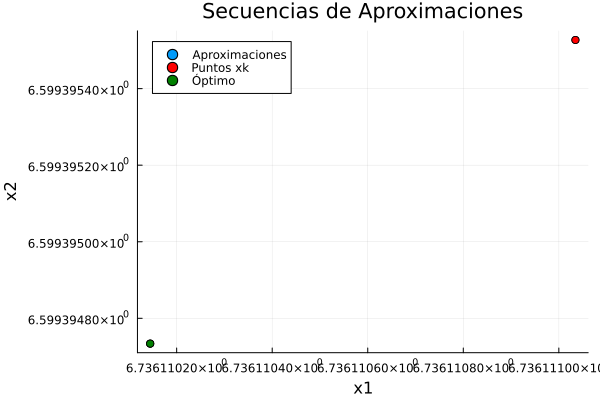

In [83]:
using Plots

function plot_approximations(results, xk)
    for (x_opt, xk_seq, fk, errores, iteraciones, convergencia) in results
        scatter([x[1] for x in xk_seq], [x[2] for x in xk_seq], label="Aproximaciones")
        scatter!([x[1] for x in xk], [x[2] for x in xk], label="Puntos xk", color=:red)
        scatter!([x_opt[1]], [x_opt[2]], label="Óptimo", color=:green)
    end
    xlabel!("x1")
    ylabel!("x2")
    title!("Secuencias de Aproximaciones")
end

plot_approximations(results, xk)